In [132]:
# install packages
install.packages("randomForest")
install.packages("rpart")
install.packages("rpart.plot")


The downloaded binary packages are in
	/var/folders/vz/wtqqvch17ybd5sr8gf2j94cc0000gn/T//RtmpnbKcLt/downloaded_packages

The downloaded binary packages are in
	/var/folders/vz/wtqqvch17ybd5sr8gf2j94cc0000gn/T//RtmpnbKcLt/downloaded_packages

The downloaded binary packages are in
	/var/folders/vz/wtqqvch17ybd5sr8gf2j94cc0000gn/T//RtmpnbKcLt/downloaded_packages


In [133]:
# Load in libraries
library(tidyverse)
library(randomForest)
library(rpart)
library(rpart.plot)

In [137]:
# Load in datasets
test_data <- read.csv("train.csv")
train_data <- read.csv("train.csv")
sample <- read.csv("sample_submission.csv")

In [138]:
# Getting names of columns for future use of predictor variables
names(train_data)

[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "X1stFlrSF"    
[45] "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"
[81] "SalePrice"

In [90]:
# make condition1 as factor not character
train_data$Condition1 <- as.factor(train_data$Condition1)

In [136]:
# summarize data
summary(train_data)

   MSSubClass        MSZoning    LotFrontage       LotArea       LotShape  
 Min.   : 20.00   C (all):  9   Min.   : 21.0   Min.   :  1300   IR1 :382  
 1st Qu.: 20.00   FV     : 50   1st Qu.: 60.0   1st Qu.:  7590   IR2 : 36  
 Median : 50.00   RH     : 13   Median : 69.0   Median :  9480   IR3 :  8  
 Mean   : 56.66   RL     :919   Mean   : 69.8   Mean   : 10504   Reg :743  
 3rd Qu.: 70.00   RM     :178   3rd Qu.: 78.0   3rd Qu.: 11700   None:  0  
 Max.   :190.00   None   :  0   Max.   :313.0   Max.   :164660             
                                                                           
   LotConfig    Neighborhood   Condition1     BldgType     HouseStyle 
 Corner :207   NAmes  :184   Norm   :1001   1Fam  :979   1Story :581  
 CulDSac: 81   CollgCr:124   Feedr  :  67   2fmCon: 23   2Story :355  
 FR2    : 36   OldTown: 93   Artery :  43   Duplex: 43   1.5Fin :122  
 FR3    :  3   Edwards: 76   RRAn   :  22   Twnhs : 32   SLvl   : 50  
 Inside :842   Somerst: 65   PosN   :

In [93]:
# Select relevant predictors for linear regression
predictors <- c("LotArea", "OverallQual", "OverallCond", "YearBuilt", "GrLivArea")
formula <- as.formula(paste("SalePrice ~", paste(predictors, collapse = "+")))

In [142]:
# Split the training data into test & training sets
set.seed(42)  # Set seed for reproducibility
train_indices <- sample(1:nrow(train_data), 0.8 * nrow(train_data))
training_data <- train_data[train_indices, ]
testing_data <- train_data[-train_indices, ]

In [151]:
# MODEL 1: LINEAR REGRESSION

In [141]:
# Fit a linear regression model on the training set
train_linear_model <- lm(formula, data = training_data)

In [140]:
# Evaluate the model on the testing set
predicted_values <- predict(train_linear_model, newdata = testing_data)
actual_values <- testing_data$SalePrice

In [139]:
# Calculate Mean Absolute Error 
mae <- mean(abs(predicted_values - actual_values))
cat("Mean Absolute Error (Linear Regression):", mae, "\n")

Mean Absolute Error (Linear Regression): 25140.23 


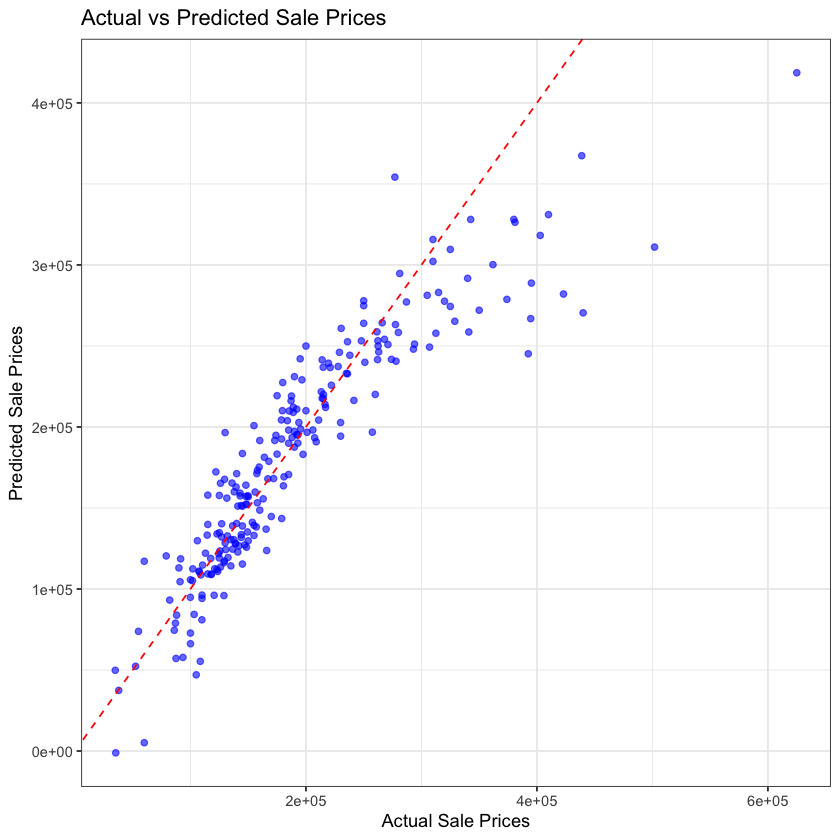

In [107]:
# Visualizations for Linear Regression
# Actual vs Predicted Values
ggplot(data = testing_data, aes(x = actual_values, y = predicted_values)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Actual vs Predicted Sale Prices",
       x = "Actual Sale Prices",
       y = "Predicted Sale Prices") +
  theme_bw()

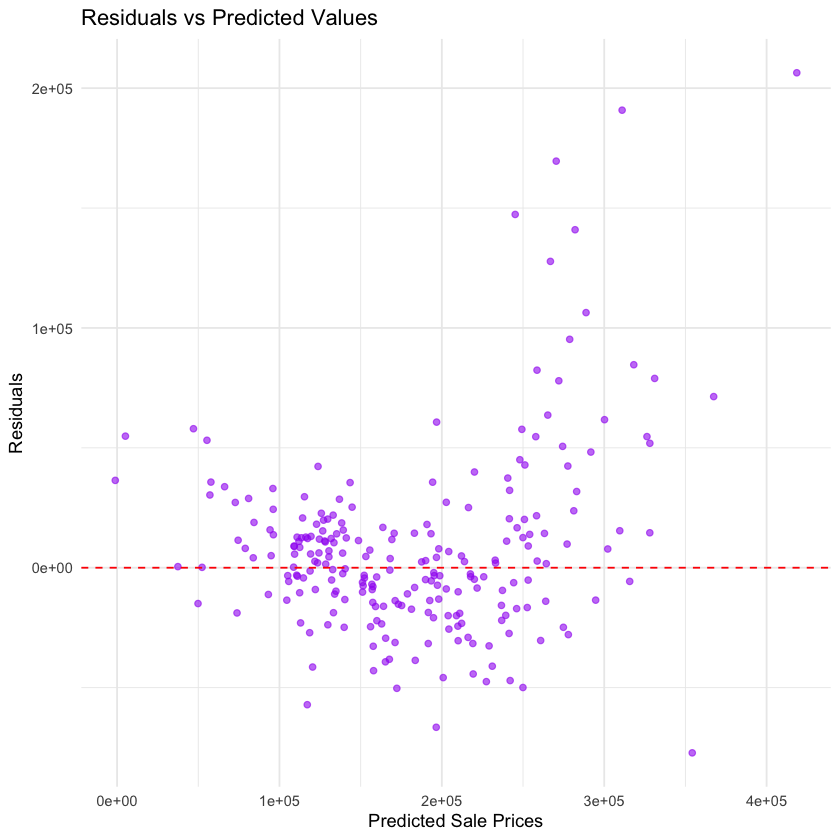

In [108]:
# Residuals Plot
residuals <- actual_values - predicted_values

ggplot(data = testing_data, aes(x = predicted_values, y = residuals)) +
  geom_point(color = "purple", alpha = 0.6) +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Residuals vs Predicted Values",
       x = "Predicted Sale Prices",
       y = "Residuals") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


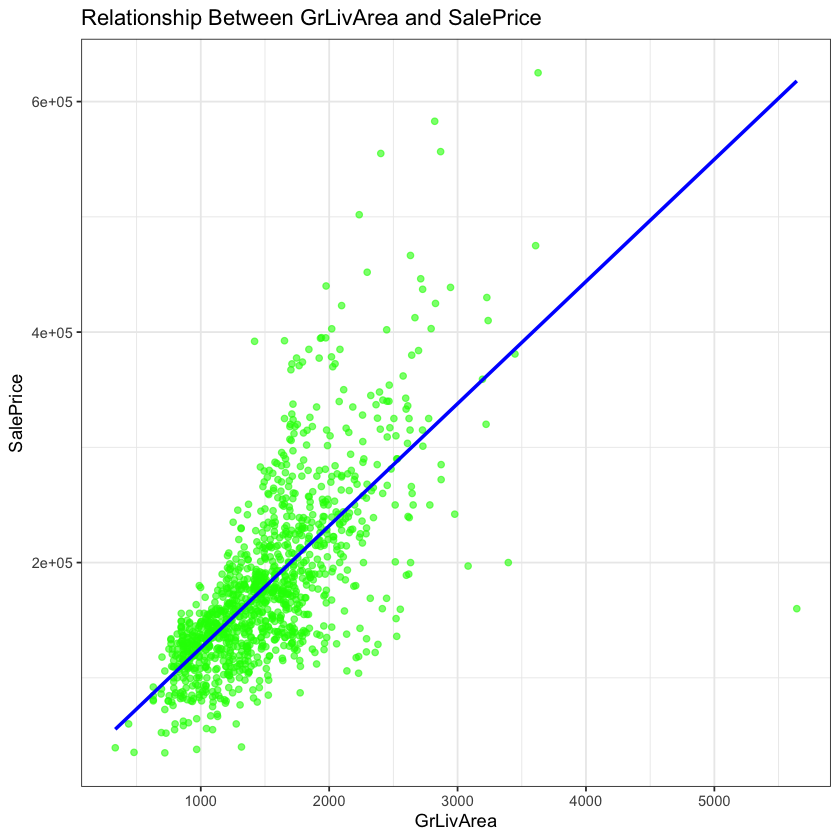

In [112]:
# Visualize Relationship Between Key Predictor and Target
key_predictor <- "GrLivArea"

ggplot(data = train_data, aes(x = .data[[key_predictor]], y = SalePrice)) +
  geom_point(color = "green", alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue", se = FALSE) +
  labs(title = paste("Relationship Between", key_predictor, "and SalePrice"),
       x = key_predictor,
       y = "SalePrice") +
  theme_bw()

In [152]:
# MODEL 2: DECISION TREE

In [113]:
# Decision Tree Model using get_maxavgerror Function
get_maxavgerror <- function(maxdepth, target, predictors, training_data, testing_data) {
  predictors <- paste(predictors, collapse = "+")
  formula <- as.formula(paste(target, "~", predictors, sep = ""))
  
  model <- rpart(formula, data = training_data,
                 control = rpart.control(maxdepth = maxdepth))
  
  predictions <- predict(model, newdata = testing_data)
  actuals <- testing_data[[target]]
  
  maxavgerror <- mean(abs(predictions - actuals))
  return(maxavgerror)
}

In [169]:
# Test the get_mae function
target <- "SalePrice"
maxdepth_values <- seq(1, 10)
maxavgerror_values <- sapply(maxdepth_values, function(depth) {
  get_mae(depth, target, predictors, training_data, testing_data)
})


In [155]:
# Find the maxdepth with the lowest maxavgerror
optimal_maxdepth <- maxdepth_values[which.min(maxavgerror_values)]
cat("Optimal maxdepth for Decision Tree:", optimal_maxdepth, "\n")

Optimal maxdepth for Decision Tree: 4 


In [156]:
# Train a Decision Tree model
decision_tree_model <- rpart(formula, data = training_data,
                             control = rpart.control(maxdepth = optimal_maxdepth))

In [157]:
# Predictions for the testing set
dt_predictions <- predict(decision_tree_model, newdata = testing_data)

In [158]:
# Calculate Residuals
dt_residuals <- testing_data$SalePrice - dt_predictions

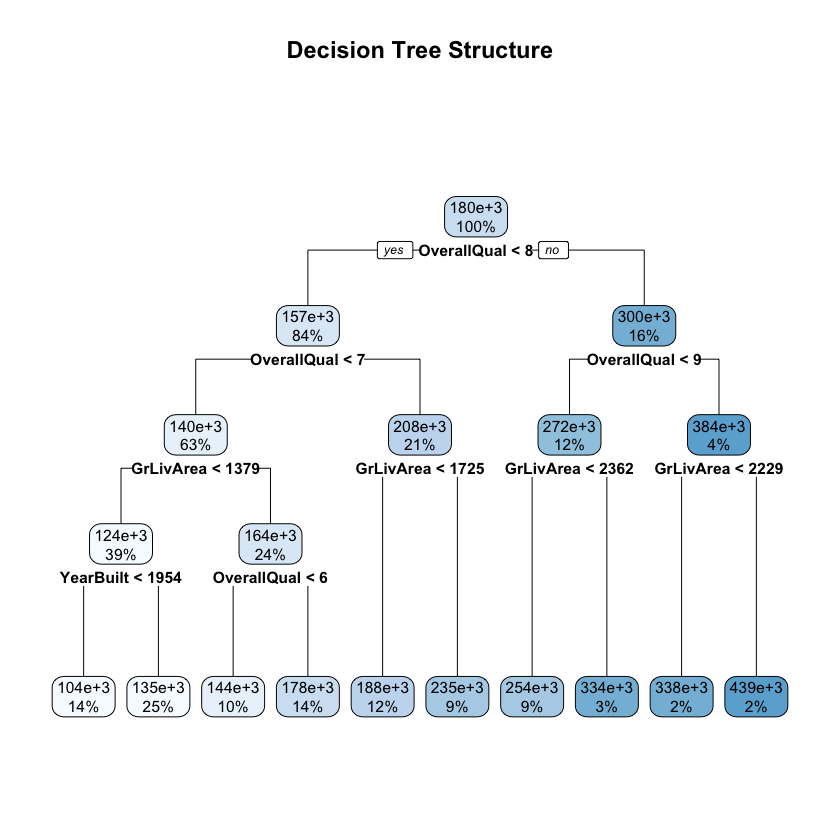

In [161]:
# Decision Tree Visualizations
# 1: Plot the Decision Tree
rpart.plot(decision_tree_model, main = "Decision Tree Structure")

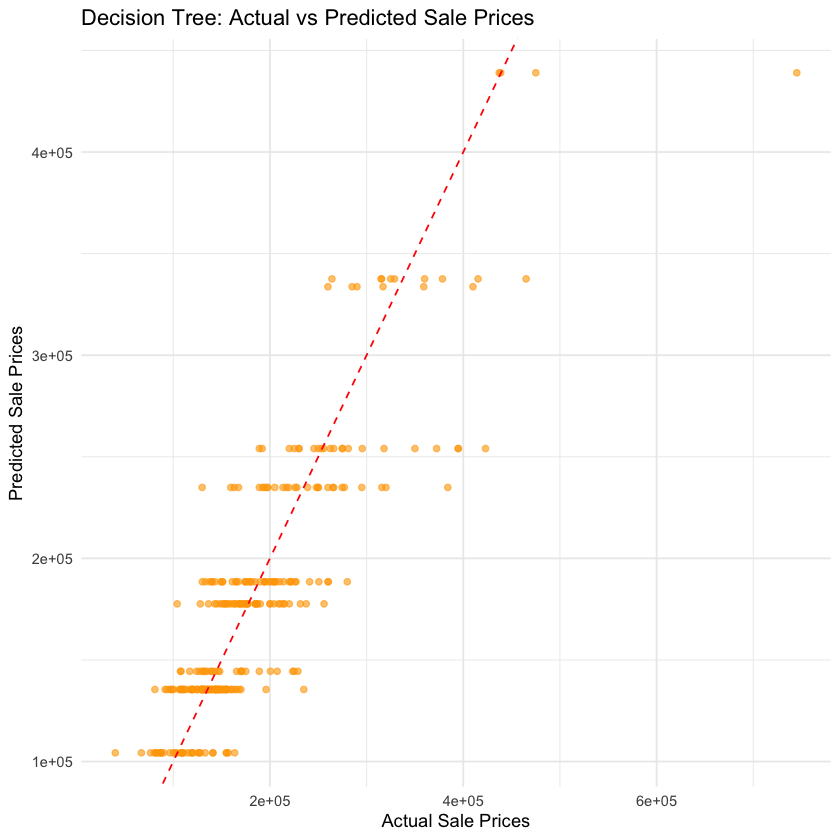

In [160]:
# 2: Actual vs Predicted Values for Decision Tree
ggplot(data = testing_data, aes(x = SalePrice, y = dt_predictions)) +
  geom_point(color = "orange", alpha = 0.6) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Decision Tree: Actual vs Predicted Sale Prices",
       x = "Actual Sale Prices",
       y = "Predicted Sale Prices") +
  theme_minimal()

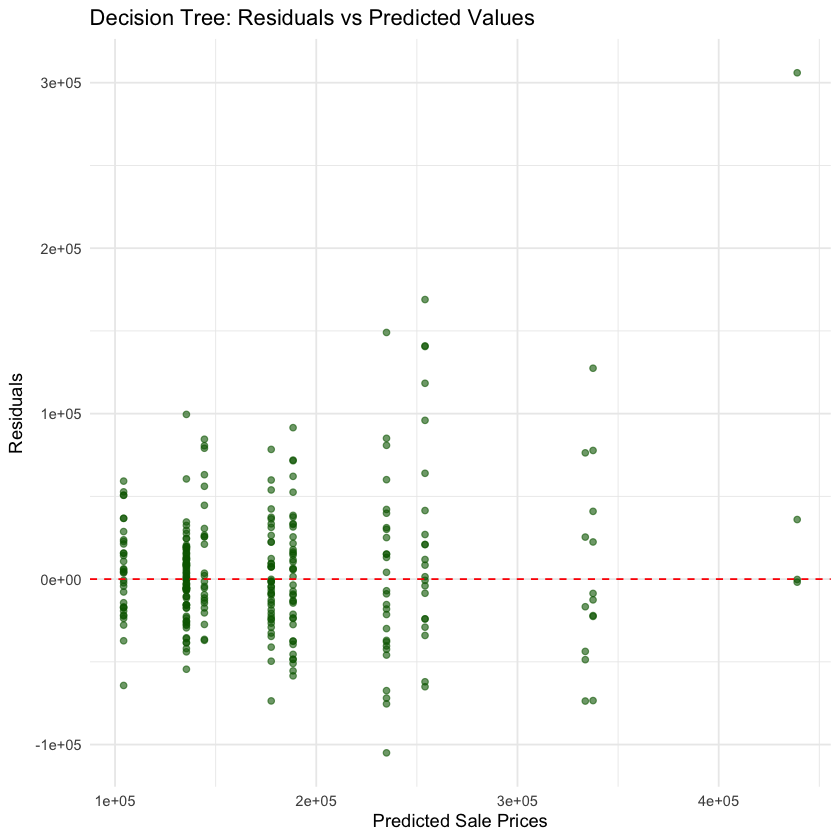

In [162]:
# 3: Residuals Plot for Decision Tree
ggplot(data = testing_data, aes(x = dt_predictions, y = dt_residuals)) +
  geom_point(color = "darkgreen", alpha = 0.6) +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Decision Tree: Residuals vs Predicted Values",
       x = "Predicted Sale Prices",
       y = "Residuals") +
  theme_minimal()

In [163]:
# MODEL 3: RANDOM FOREST MODEL

In [164]:
# Random Forest Model
rf_model <- randomForest(SalePrice ~ ., data = training_data[, c(predictors, "SalePrice")])

In [165]:
# Make predictions on the testing set
rf_predictions <- predict(rf_model, newdata = testing_data)

In [166]:
# Calculate maxavgerror for Random Forest
rf_maxavgerror <- mean(abs(rf_predictions - testing_data$SalePrice))
cat("Mean Absolute Error (Random Forest):", rf_maxavgerror, "\n")

Mean Absolute Error (Random Forest): 20591.96 


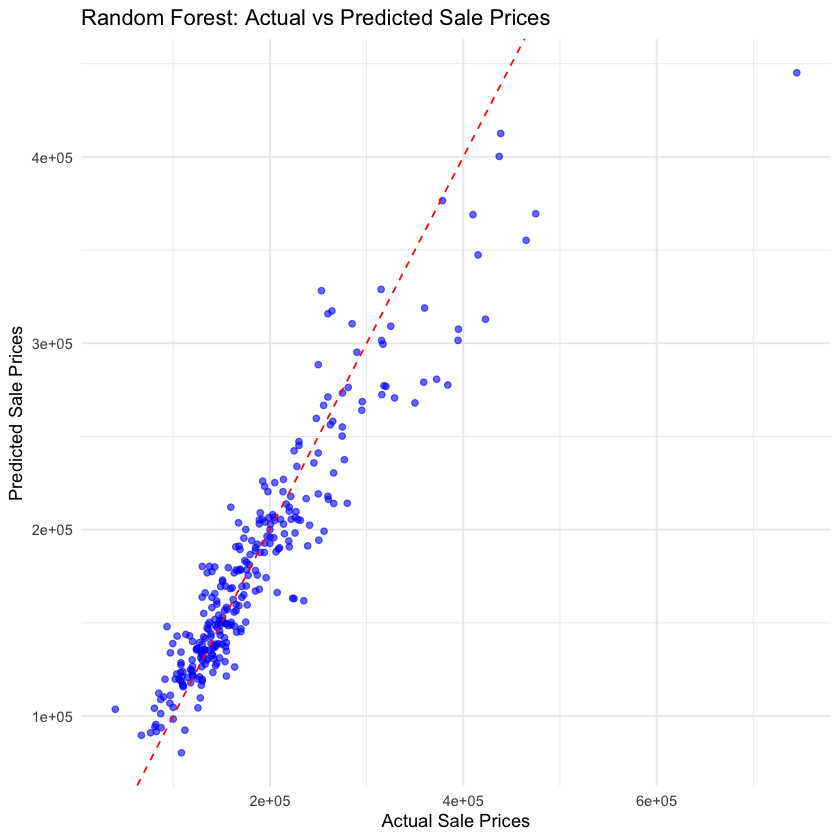

In [170]:
# Visualizations for Random Forest
# 1: Actual vs Predicted Values
ggplot(data = testing_data, aes(x = SalePrice, y = rf_predictions)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Random Forest: Actual vs Predicted Sale Prices",
       x = "Actual Sale Prices",
       y = "Predicted Sale Prices") +
  theme_minimal()

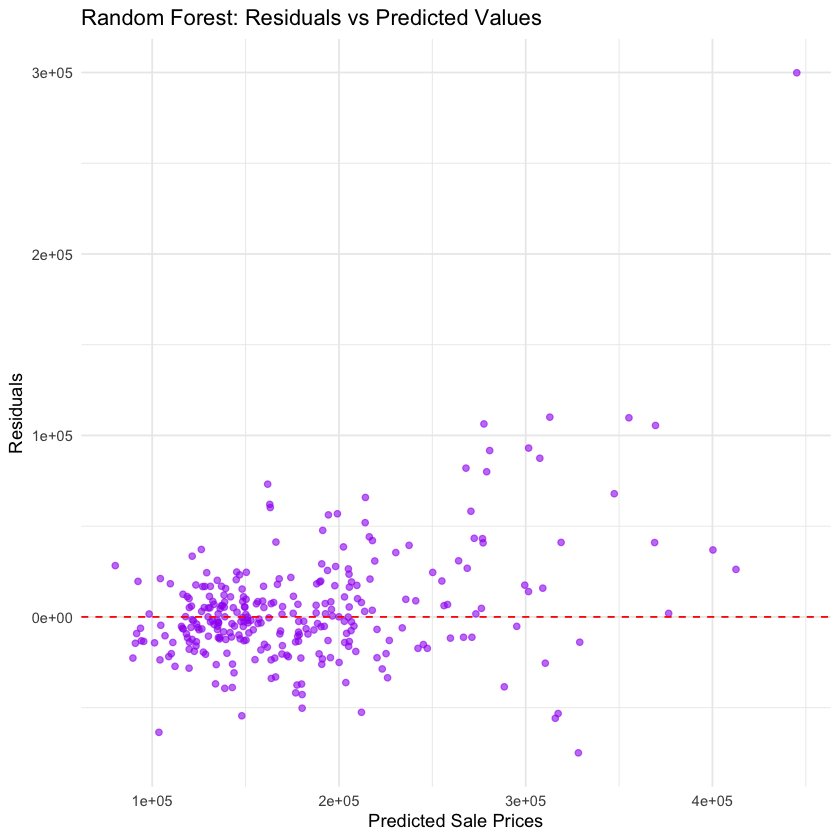

In [171]:
# 2: Residuals Plot
rf_residuals <- testing_data$SalePrice - rf_predictions

ggplot(data = testing_data, aes(x = rf_predictions, y = rf_residuals)) +
  geom_point(color = "purple", alpha = 0.6) +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Random Forest: Residuals vs Predicted Values",
       x = "Predicted Sale Prices",
       y = "Residuals") +
  theme_minimal()


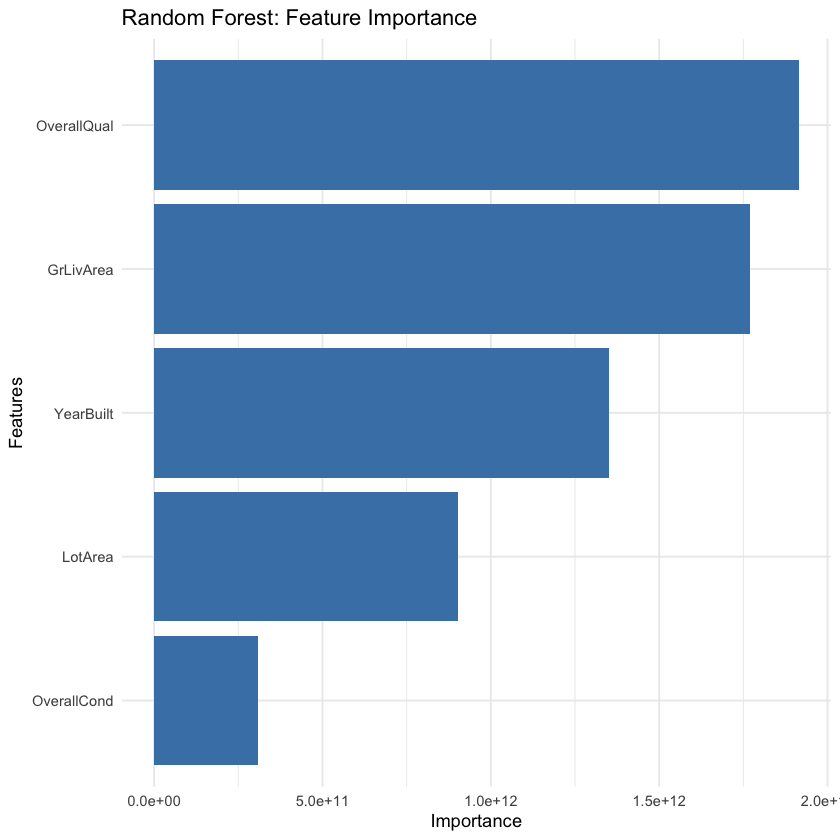

In [172]:
# 3: Feature Importance Plot
rf_importance <- importance(rf_model)
rf_importance_df <- data.frame(Feature = rownames(rf_importance),
                               Importance = rf_importance[, 1])

ggplot(rf_importance_df, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Random Forest: Feature Importance",
       x = "Features",
       y = "Importance") +
  theme_minimal()